# load project

This is project for modeling combined depth mask

In [1]:
!git clone https://github.com/Mike030668/Depth_Maker.git
%cd Depth_Maker
!pip install -r requirements.txt


Cloning into 'Depth_Maker'...
remote: Enumerating objects: 206, done.
remote: Counting objects: 100% (128/128), done.
remote: Compressing objects: 100% (91/91), done.
remote: Total 206 (delta 51), reused 103 (delta 28), pack-reused 78 (from 1)
Receiving objects: 100% (206/206), 102.69 MiB | 30.58 MiB/s, done.
Resolving deltas: 100% (60/60), done.
/content/Depth_Maker
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 318.1/318.1 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.5/101.5 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 6.8 MB/s eta 0:00:00


# Define project root

In [1]:
import sys
import os
from pathlib import Path

try:
    import google.colab
    # Colab, путь к проекту абсолютный
    project_root = Path("/content/Depth_Maker").resolve()
    print("Running in Google Colab environment.")
except ImportError:
    # Локальное окружение
    project_root = Path(__file__).resolve().parent.parent
    print("Running locally.")

# Добавляем проект в sys.path
sys.path.append(str(project_root))
print(f"Project root: {project_root}")

Running in Google Colab environment.
Project root: /content/Depth_Maker


# Init pipeline
по конструированию итого изображения

**background** - можно картинкой, можно сразу маской глубины какого-то фона.



пути в Colab без r"" и бэкслешей

In [2]:
# идем в в текущую версию проекта, сейчас depth_maker.dm_v1
from depth_maker.dm_v1.constructor_layered_image import LogoOverlayPipeline

#background_filename=r"tests\backgrounds\tree_road_2.webp" # local
background_filename = "tests/backgrounds/tree_road_2.webp"

#combined_image_path=r"results\combined_image.png" # local
combined_image_path = "results/combined_image.png"

pipeline = LogoOverlayPipeline(
    dir_path=project_root,
    background_filename=background_filename,
    background_size=(1024, 864), # лучше кратно 16
    combined_image_path = combined_image_path,
    enable_logging=True
)



INFO:LogoOverlayPipeline:Логирование включено.


# Load images of objects

**objects** - может быть:
- какой-то картинка объекта на белом или черном фоне;
- или например где-то сделанная маска глубины, но обрезанная по краям и помещенная на черный фо;
- или проекция 3D объекта, обрезанная по краям и помещенная на черный фон;

parametrs:
- `filename` - путь к файлу в проекте. Можно сделать папку и подпапки туда грузить фоны и объекты с белым фоном.

- `sizes` - замер объекта при расположении на фоне

- `point` - (X, Y) координата правой нижней точки

- `alpha` - прозрачность alpha канала





также пути в Colab  без r"" и бэкслешей

In [3]:
# Create a test logo and add it to the logos_info list
# pipeline.create_test_logo() #constarct test simple image

#
pipeline.logos_info = [
    {
        #'filename': r"tests\objects\sbercat_book.png", # local
        'filename': "tests/objects/sbercat_book.png",
        'sizes': (210, 430),
        'point': (650, 690),
        'alpha': 1
    },

    {
        #'filename': r"tests\objects\pngtree_red_1.png", # local
        'filename': "tests/objects/pngtree_red_1.png",
        'sizes': (90, 90),
        'point': (800, 800),
        'alpha': 1
    },

    {
        #'filename': r"tests\objects\pngtree_red_2.png", # local
        'filename': "tests/objects/pngtree_red_2.png",
        'sizes': (65, 65),
        'point': (730, 600),
        'alpha': 1
    },

    {
        #'filename': r"tests\objects\papik_1.png", # local
        'filename': "tests/objects/papik_1.png",
        'sizes': (170, 200),
        'point': (430, 810),
        'alpha': 1
    }

    ]

# Create a layered image object
layered_image = pipeline.overlay_multiple_logos()

# Save the combined image to a file
pipeline.save_combined_image(layered_image)

# Save if need to get caption with help converter later
#file_name = r'results\layered_image_object.pkl' # local
file_name = 'results/layered_image_object.pkl'
save_path = project_root / Path(file_name)


# Save the combined image to a file
layered_image.save(save_path)


# Visualize the combined image with a grid
combined_image = layered_image.render()
pipeline.visualize_with_grid(combined_image)



Output hidden; open in https://colab.research.google.com to view.

# Download_model depth model

Сейчас используем только Depth_Anything_V2 модель, как лучшую и она во Flux_tools используется, но можно интегрровать новые и старые, например MiDas

In [4]:
from depth_maker.dm_v1.utils import download_model
# URL модели на Hugging Face
type_encoder = 'vitl'
model_url = f"https://huggingface.co/depth-anything/Depth-Anything-V2-Large/resolve/main/depth_anything_v2_{type_encoder}.pth?download=true"
# Локальный путь для сохранения модели
checkpoint_path = project_root / "checkpoints" / "Depth_Anything_V2" / "depth_anything_v2_vitl.pth"
# Загрузка модели
download_model(model_url, str(checkpoint_path))


/content/Depth_Maker/checkpoints/Depth_Anything_V2/depth_anything_v2_vitl.pth:   0%|          | 0.00/1.25G [00…

# Load saved layered_image_object

In [5]:
from depth_maker.dm_v1.constructor_layered_image import LayeredImageObject
from depth_maker.dm_v1.stylized_layered_masks import StylizedLayeredImageObject

file_name = r'layered_image_object.pkl'
file_path = project_root / 'results' / file_name
# Load the LayeredImageObject
loaded_layered_image = LayeredImageObject.load(str(file_path))


# Get stylized_layered_image_object

- Создаем из loaded_layered_image stylized_layered_image_object применяя выбранные вариант извлечения масок слоев, например `depth_anth`.
- Можно выбирать не `depth_anth`, а например:
 - `lineart` и его параметр:
   - `gaussian_sigma`: `1.0`,
   - `intensity_threshold`: `30`,
 - `canny` и его параметр:
   - `low_threshold`: `50`,
   - `intensity_threshold`: `150`,
- Можно повращать  объект  в плоскости и/или отразить по оси.
  - `rotation_angle`: `10`
  - `reflection`:`horizontal` #`vertical`,`both`,`none`

- Методы `rotation_angle` и  `reflection` планирую или перенести, или скорее просто дополнить в первой шаг по созданию послойного изоббражения из фона и объектов.

*Этот шаг выделен как опция, чтобы можно было далее поиграться контрастность и интенсивностью взаимной слоев и сделать разныей варианта. Так как извлечение маски работает дольше.*

In [6]:
# Локальный путь для сохранения модели
checkpoint_path = project_root / "checkpoints" / "Depth_Anything_V2" / "depth_anything_v2_vitl.pth"

# Background processing parameters
background_params = {
    'method': 'depth_anth',
    # Add more parameters if needed
}

# Logos processing parameters with rotation and canny/lineart
logos_params = [
    {
        'method': 'depth_anth',
        #'rotation_angle': 0,  # No rotation
        'reflection': 'horizontal',  # Явно указываем
        # Add more parameters if needed
    },

    {
        'method': 'lineart',
        'gaussian_sigma': 8.0,
        'intensity_threshold': 30,
        'rotation_angle': 0,  # rotation
        # Add more parameters if needed
    },

    {
        'method': 'canny',
        'low_threshold': 50,
        'high_threshold': 1750,
        #'rotation_angle': 25,  # No rotation
        'reflection': 'horizontal',  # Явно указываем
        # Add more parameters if needed
    },


    {
        'method': 'depth_anth',
        #'rotation_angle': 30 , # No rotation
        #'reflection': 'horizontal',  # Явно указываем
        # Add more parameters if needed
    }
]


# Initialize StylizedLayeredImageObject with depth model
stylized_layered_image = StylizedLayeredImageObject(
    loaded_layered_image,
    background_params=background_params,
    logos_params=logos_params,
    depth_model_checkpoint=checkpoint_path,  # Path to your depth model checkpoint
    depth_encoder='vitl'  # Specify the encoder type used in your model
)

# Сохранение объекта после его создания
#file_name = r'results\stylized_layered_image.pkl' # local
file_name = 'results/stylized_layered_image.pkl'
save_path = project_root / Path(file_name)
stylized_layered_image.save_stylized_layered_image_object(save_path)

Layered image object saved to /content/Depth_Maker/results/stylized_layered_image.pkl


## Show in magma view

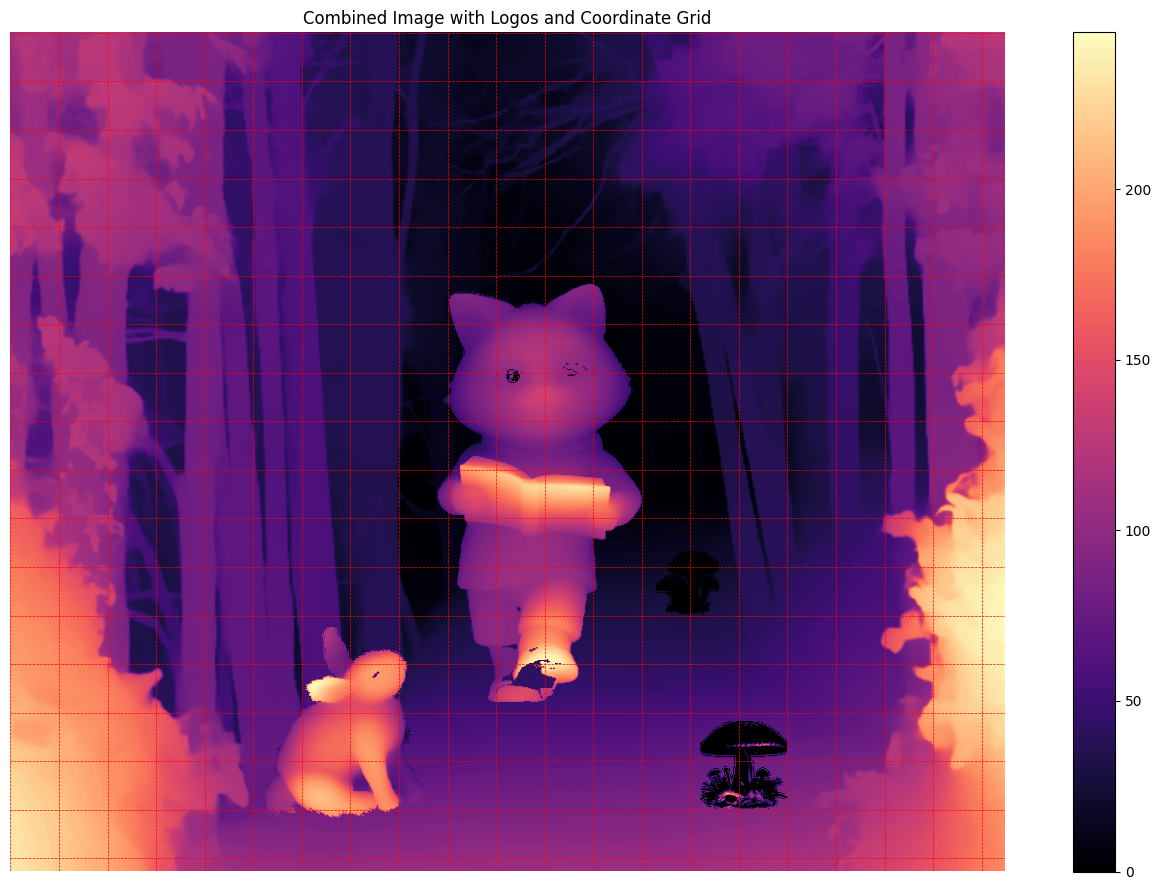

In [7]:
stylized_layered_image.visualize_with_grid()

## Show in BW view

- LinArt and Canny have a simple view

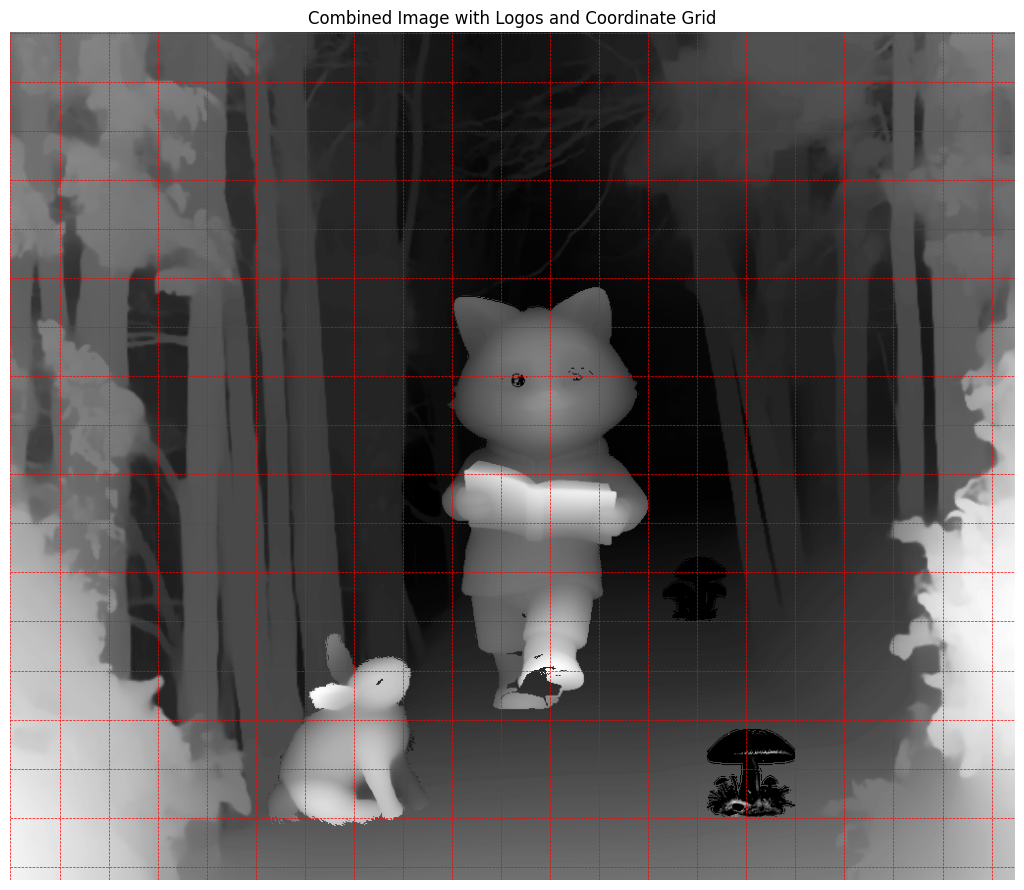

In [5]:
stylized_layered_image.visualize_with_grid(mode = "gray")

## Apply contrast and bridhthess after

it is making quiqly and possibly make different variants for testing in generation.

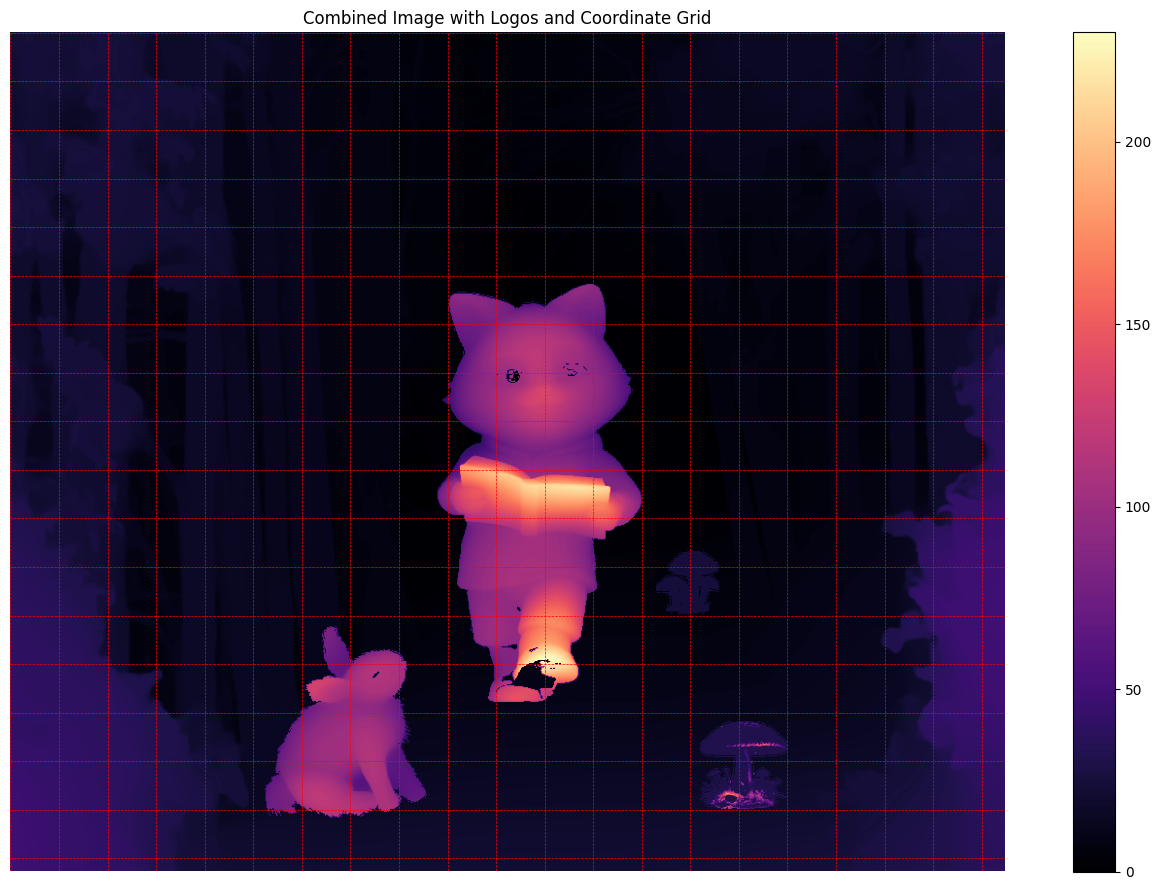

In [9]:
from depth_maker.dm_v1.constructor_layered_image import LayeredImageObject
from depth_maker.dm_v1.stylized_layered_masks import StylizedLayeredImageObject

file_name = r'stylized_layered_image.pkl'
file_path = project_root / 'results' / file_name
# Load the LayeredImageObject
loaded_stylized_layered_image = LayeredImageObject.load(str(file_path))

# Background processing parameters
background_params = {
    'method': 'none',
    'brightness': 0.9,
    'contrast': 0.2,
    # Add more parameters if needed
}

# Logos processing parameters with rotation and canny/lineart
logos_params = [
    {
        'method': 'none',
        'brightness': 10,
        'contrast': 0.9,
    },
    {
        'method': 'none',
        'brightness': 32,
        'contrast': 0.7,
    },

    {
        'method': 'none',
        'brightness': 25,
        'contrast': 0.5,
    },

    {
        'method': 'none',
        'brightness': 35,
        'contrast': 0.4,
    }
]

# Final processing parameters (optional)
final_processing_params = {
    'method': 'threshold',
    'threshold_value': 128
}

# Initialize StylizedLayeredImageObject with depth model
stylized_layered_image = StylizedLayeredImageObject(
    loaded_stylized_layered_image,
    background_params=background_params,
    logos_params=logos_params,
    #final_processing_params=final_processing_params,  # Uncomment if needed
)

stylized_layered_image.visualize_with_grid()

# Make all - masks, roating, reflect, brightness, reflect intime

In [10]:
from depth_maker.dm_v1.constructor_layered_image import LayeredImageObject


file_name = r'layered_image_object.pkl'
file_path = project_root / 'results' / file_name
# Load the LayeredImageObject
loaded_layered_image = LayeredImageObject.load(str(file_path))

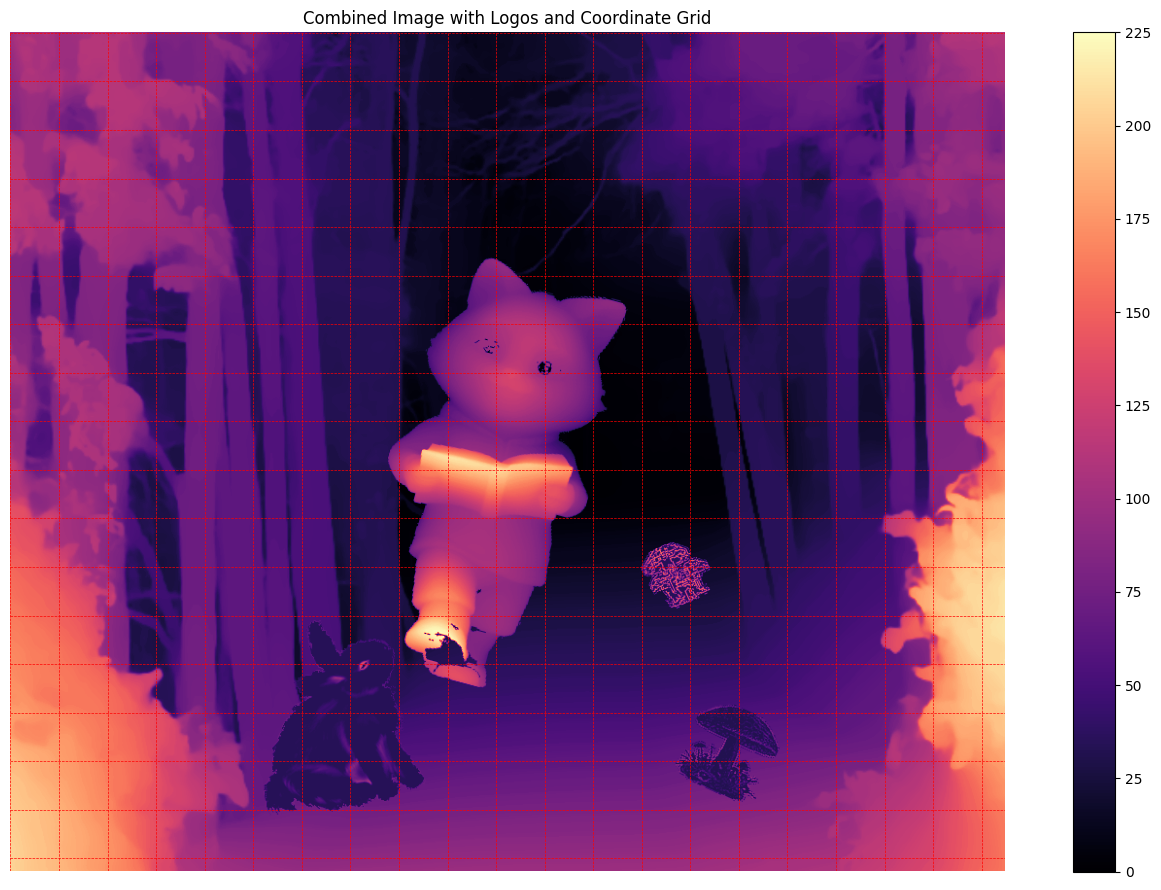

In [11]:
from depth_maker.dm_v1.stylized_layered_masks import StylizedLayeredImageObject
# Локальный путь для сохранения модели
checkpoint_path = project_root / "checkpoints" / "Depth_Anything_V2" / "depth_anything_v2_vitl.pth"

file_name = r'layered_image_object.pkl'
file_path = project_root / 'results' / file_name
# Load the LayeredImageObject
loaded_layered_image = LayeredImageObject.load(str(file_path))

# Background processing parameters
background_params = {
    'method': 'depth_anth',
    'brightness': 0.9,
    'contrast': 0.9,
    # Add more parameters if needed
}

# Logos processing parameters with rotation and canny/lineart
logos_params = [
    {
        'method': 'depth_anth',
        'brightness': 10,
        'contrast': 0.9,
        'reflection`':'horizontal',
         'rotation_angle': -15,  # No rotation
    },
    {
        'method': 'lineart',
        'gaussian_sigma': 1.0,
        'intensity_threshold': 30,
        'brightness': 32,
        'contrast': 0.7,
        'rotation_angle': -25,  # No rotation
        'reflection`':'horizontal',
    },

    {
        'method': 'canny',
        'low_threshold': 50,
        'high_threshold': 150,
        'brightness': 35,
        'contrast': 0.5,
        'rotation_angle': 25,  # No rotation
        'reflection`':'both',
    },

    {
        'method': 'lineart',
        'gaussian_sigma': 8.0,
        'intensity_threshold': 30,
        'brightness': 35,
        'contrast': 0.4,
        'rotation_angle': 5,  # No rotation
        'reflection`':'vertical',
    }
]

# Final processing parameters (optional)
final_processing_params = {
    'method': 'threshold',
    'threshold_value': 128
}

# Initialize StylizedLayeredImageObject with depth model
stylized_layered_image = StylizedLayeredImageObject(
    loaded_layered_image,
    background_params=background_params,
    logos_params=logos_params,
    #final_processing_params=final_processing_params,  # Uncomment if needed
    depth_model_checkpoint=checkpoint_path,  # Path to your depth model checkpoint
    depth_encoder='vitl'  # Specify the encoder type used in your model
    )

stylized_layered_image.visualize_with_grid()

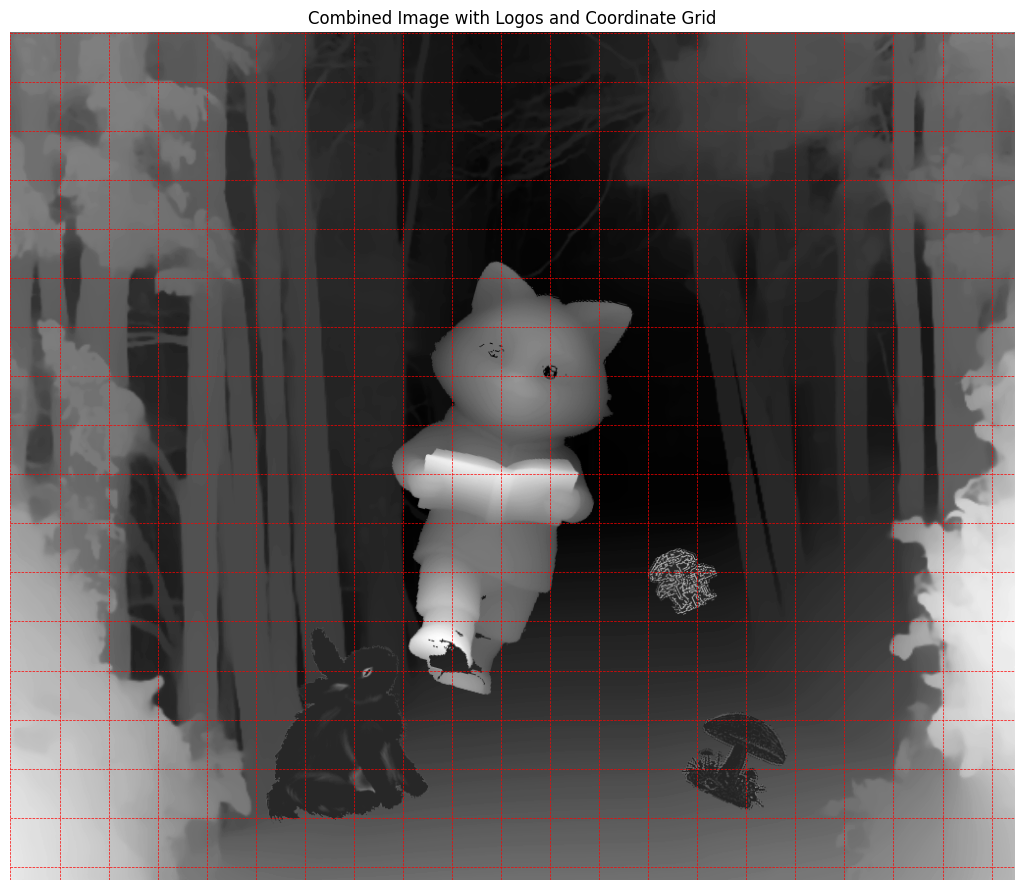

In [12]:
stylized_layered_image.visualize_with_grid(mode = "gray")